# Практическое занятие 2
## Задача линейного программирования
### Вариант 5
$$F = x₁ + 2x₂ → min,max$$
### Ограничения:
$$
x ₁+ 2 x ₂≤6;
2 x ₁+x ₂≤ 8;
x ₂ ≤2;
x ₁, x ₂≥ 0
$$









### Решение с использованием библиотеки PuLP
1. Загружаем библиотеку pulp:

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.8 MB/s eta 0:00:00


2. Импортируем библиотеки:


In [ ]:
import pulp
import time

3. Решаем задание
### Задача минимизации:

In [ ]:
start=time.time()
prob_min = pulp.LpProblem("Minimization", pulp.LpMinimize)
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)

prob_min += x1 + 2*x2, "Objective"
prob_min += x1 + 2*x2 <= 6, "Constraint1"
prob_min += 2*x1 + x2 <= 8, "Constraint2"
prob_min += x2 <= 2, "Constraint3"

prob_min.solve()
print("\n Минимализация:")
print(f"Статус: {pulp.LpStatus[prob_min.status]}")
print(f"x₁ = {x1.varValue:.3f}, x₂ = {x2.varValue:.3f}")
print(f"F_min = {pulp.value(prob_min.objective):.3f}")


stop = time.time()
print("Время:")
print(stop-start)


 Минимализация:
Статус: Optimal
x₁ = 0.000, x₂ = 0.000
F_min = 0.000
Время:
0.0068359375


###Задача максимизации:

In [ ]:
start = time.time()
prob_max = pulp.LpProblem("Maximization", pulp.LpMaximize)
x1_max = pulp.LpVariable('x1_max', lowBound=0)
x2_max = pulp.LpVariable('x2_max', lowBound=0)

prob_max += x1_max + 2*x2_max, "Objective"
prob_max += x1_max + 2*x2_max <= 6, "Constraint1"
prob_max += 2*x1_max + x2_max <= 8, "Constraint2"
prob_max += x2_max <= 2, "Constraint3"

prob_max.solve()
print("\n Максимализация:")
print(f"Статус: {pulp.LpStatus[prob_max.status]}")
print(f"x₁ = {x1_max.varValue:.3f}, x₂ = {x2_max.varValue:.3f}")
print(f"F_max = {pulp.value(prob_max.objective):.3f}")

stop = time.time()
print("Время:")
print(stop-start)


 Максимализация:
Статус: Optimal
x₁ = 3.333, x₂ = 1.333
F_max = 6.000
Время:
0.008690118789672852


### Решение с использованием библиотеки scipy.Optimize
1. Импортируем библиотеки:

In [ ]:
from scipy import optimize
from scipy.optimize import linprog

2. Решение
#### Минимизация:

In [ ]:
start = time.time()
c_min = [1, 2]
c_max = [-1, -2]

A_ub = [
    [1, 2],  # x₁ + 2x₂ ≤ 6
    [2, 1],  # 2x₁ + x₂ ≤ 8
    [0, 1]   # x₂ ≤ 2
]
b_ub = [6, 8, 2]


bounds = [(0, None), (0, None)]

result_min = linprog(c_min, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')
print("\n Минимизация:")
print(f"Статус: {result_min.message}")
print(f"x₁ = {result_min.x[0]:.3f}, x₂ = {result_min.x[1]:.3f}")
print(f"F_min = {result_min.fun:.3f}")

stop = time.time()
print("Время:")
print(stop-start)


 Минимизация:
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
x₁ = 0.000, x₂ = 0.000
F_min = 0.000
Время:
0.017481327056884766


#### Максимизация:

In [ ]:
start = time.time()
result_max = linprog(c_max, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')
print("\n Максимизация:")
print(f"Статус: {result_max.message}")
print(f"x₁ = {result_max.x[0]:.3f}, x₂ = {result_max.x[1]:.3f}")
print(f"F_max = {-result_max.fun:.3f}")

stop = time.time()
print("Время:")
print(stop-start)


 Максимизация:
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
x₁ = 2.000, x₂ = 2.000
F_max = 6.000
Время:
0.01267099380493164


### Решение с использованием библиотеки cvxopt

1. Импортируем библиотеки:


In [ ]:
from cvxopt.modeling import variable, op
from cvxopt import matrix, solvers
import numpy as np

2. Решение задачи
#### Минимизация:

In [ ]:
start = time.time()

print("\nМинимизация:")
c_min = matrix([1., 2.])

G_min = matrix([
    [1., 2.],
    [2., 1.],
    [0., 1.],
    [-1., 0.],
    [0., -1.]
]).T

h_min = matrix([6., 8., 2., 0., 0.])

sol_min = solvers.lp(c_min, G_min, h_min)
print(f"Статус: {sol_min['status']}")
print(f"x₁ = {sol_min['x'][0]:.3f}, x₂ = {sol_min['x'][1]:.3f}")
print(f"F_min = {sol_min['primal objective']:.3f}")

stop = time.time()
print("Время:")
print(stop-start)


Минимизация:
     pcost       dcost       gap    pres   dres   k/t
 0:  5.9231e+00 -1.9308e+01  9e+00  0e+00  3e+00  1e+00
 1:  5.6857e+00 -5.6765e+00  4e+00  2e-16  1e+00  5e-01
 2:  2.2163e+00 -1.2497e+01  1e+01  5e-16  2e+00  1e+00
 3:  9.6431e-01 -1.0109e+00  2e+00  4e-16  2e-01  3e-01
 4:  1.2613e-02 -3.4671e-02  5e-02  3e-16  6e-03  1e-02
 5:  1.2633e-04 -3.4731e-04  5e-04  1e-16  6e-05  1e-04
 6:  1.2633e-06 -3.4731e-06  5e-06  2e-16  6e-07  1e-06
 7:  1.2633e-08 -3.4731e-08  5e-08  2e-16  6e-09  1e-08
Optimal solution found.
Статус: optimal
x₁ = 0.000, x₂ = 0.000
F_min = 0.000
Время:
0.0051631927490234375


#### Максимизация:

In [ ]:
start = time.time()
print("\nМаксимизаиця:")
c_max = matrix([-1., -2.])

sol_max = solvers.lp(c_max, G_min, h_min)
print(f"Статус: {sol_max['status']}")
print(f"x₁ = {sol_max['x'][0]:.3f}, x₂ = {sol_max['x'][1]:.3f}")
print(f"F_max = {-sol_max['primal objective']:.3f}")

stop = time.time()
print("Время:")
print(stop-start)


Максимизаиця:
     pcost       dcost       gap    pres   dres   k/t
 0: -5.9231e+00 -2.6846e+01  8e+00  0e+00  2e+00  1e+00
 1: -5.9815e+00 -6.3910e+00  2e-01  2e-16  4e-02  1e-02
 2: -5.9998e+00 -6.0041e+00  2e-03  4e-16  4e-04  2e-04
 3: -6.0000e+00 -6.0000e+00  2e-05  2e-16  4e-06  2e-06
 4: -6.0000e+00 -6.0000e+00  2e-07  4e-17  4e-08  2e-08
Optimal solution found.
Статус: optimal
x₁ = 2.552, x₂ = 1.724
F_max = 6.000
Время:
0.0040209293365478516


### Графический метод
1.   Импортируем библиотеки:



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

2. Построение графика:


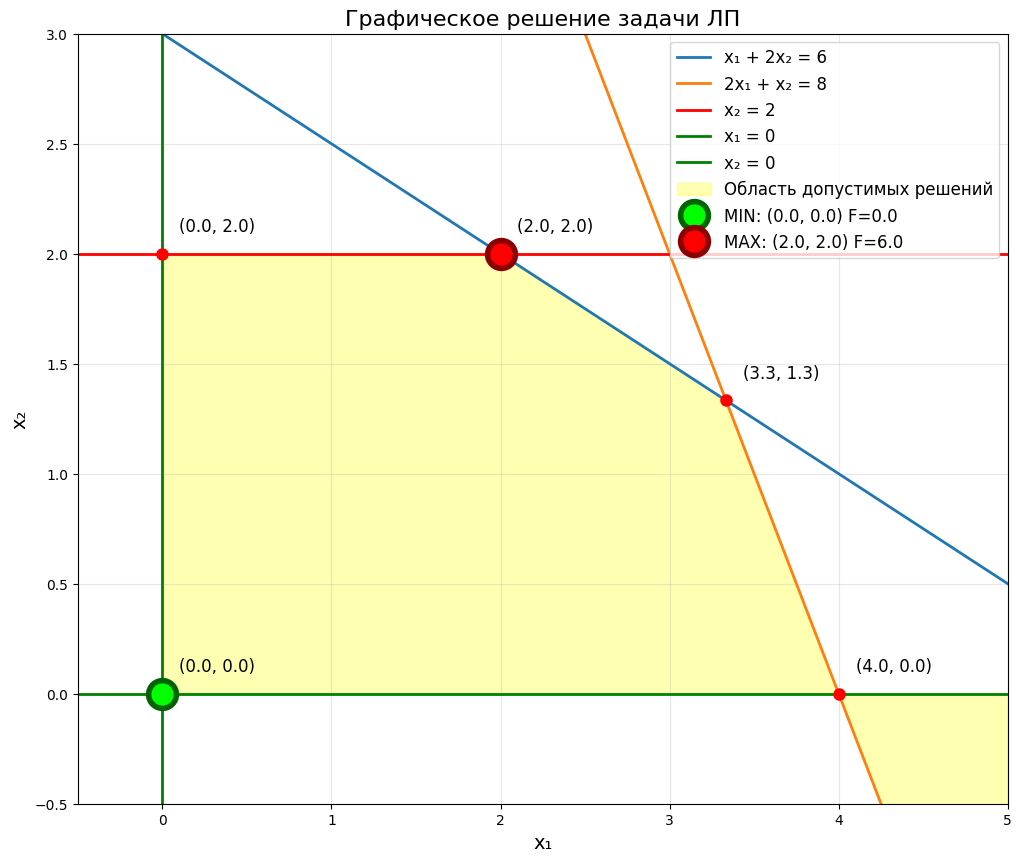

Анализ угловых точек:
Точка (0.0, 0.0): F = 0.0
Точка (0.0, 2.0): F = 4.0
Точка (2.0, 2.0): F = 6.0
Точка (3.3, 1.3): F = 6.0
Точка (4.0, 0.0): F = 4.0

 Графический метод:
Минимум: F_min = 0.0 в точке (0.0, 0.0)
Максимум: F_max = 6.0 в точке (2.0, 2.0)


In [ ]:
plt.figure(figsize=(12, 10))

x1 = np.linspace(0, 5, 100)

x2_1 = (6 - x1) / 2      # x₁ + 2x₂ ≤ 6
x2_2 = 8 - 2*x1          # 2x₁ + x₂ ≤ 8
x2_3 = np.full_like(x1, 2)  # x₂ ≤ 2

x2_feasible = np.minimum(np.minimum(x2_1, x2_2), x2_3)

plt.plot(x1, x2_1, label='x₁ + 2x₂ = 6', linewidth=2)
plt.plot(x1, x2_2, label='2x₁ + x₂ = 8', linewidth=2)
plt.axhline(y=2, color='red', linestyle='-', label='x₂ = 2', linewidth=2)
plt.axvline(x=0, color='green', linestyle='-', label='x₁ = 0', linewidth=2)
plt.axhline(y=0, color='green', linestyle='-', label='x₂ = 0', linewidth=2)

plt.fill_between(x1, 0, x2_feasible, where=(x1>=0), alpha=0.3, color='yellow', label='Область допустимых решений')

points = []
A = (0, 0)
points.append(A)

B = (0, 2)
points.append(B)

C = (2, 2)
points.append(C)

D = (10/3, 4/3)
points.append(D)

E = (4, 0)
points.append(E)

for i, (x, y) in enumerate(points):
    plt.plot(x, y, 'ro', markersize=8)
    plt.text(x+0.1, y+0.1, f'({x:.1f}, {y:.1f})', fontsize=12)

min_point = points[min_idx]
plt.plot(min_point[0], min_point[1], 'o', markersize=20, color='lime',
         markeredgewidth=4, markeredgecolor='darkgreen',
         label=f'MIN: ({min_point[0]:.1f}, {min_point[1]:.1f}) F={F_values[min_idx]:.1f}')
max_point = points[max_idx]
plt.plot(max_point[0], max_point[1], 'o', markersize=20, color='red',
         markeredgewidth=4, markeredgecolor='darkred',
         label=f'MAX: ({max_point[0]:.1f}, {max_point[1]:.1f}) F={F_values[max_idx]:.1f}')

plt.xlim(-0.5, 5)
plt.ylim(-0.5, 3)
plt.xlabel('x₁', fontsize=14)
plt.ylabel('x₂', fontsize=14)
plt.title('Графическое решение задачи ЛП', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("Анализ угловых точек:")
F_values = []
for point in points:
    F = point[0] + 2 * point[1]
    F_values.append(F)
    print(f"Точка ({point[0]:.1f}, {point[1]:.1f}): F = {F:.1f}")

min_idx = np.argmin(F_values)
max_idx = np.argmax(F_values)

print(f"\n Графический метод:")
print(f"Минимум: F_min = {F_values[min_idx]:.1f} в точке ({points[min_idx][0]:.1f}, {points[min_idx][1]:.1f})")
print(f"Максимум: F_max = {F_values[max_idx]:.1f} в точке ({points[max_idx][0]:.1f}, {points[max_idx][1]:.1f})")

#### Выводим таблицу для сравнения ответов библиотек:

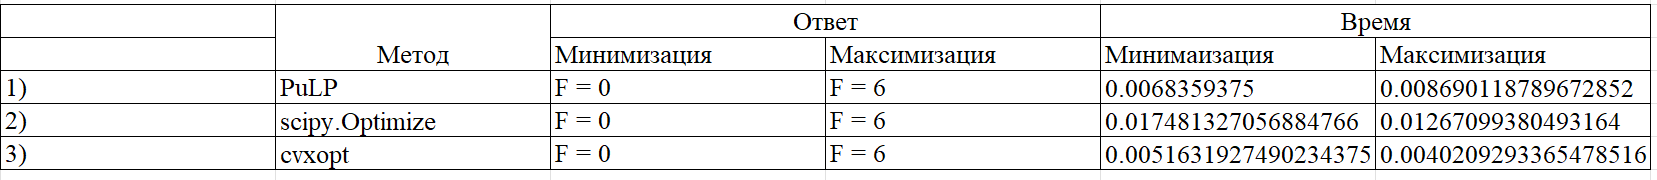

#### Данная таблица показывает, что все библиотеки получили одни и те же значения целевой функции за приблизительно одинаковое время.

#### Вывод: в ходе данной работы мы познакомились с библиотеками PuLP, scipy.Optimize, cvxopt. Они были протестированы для решения задач линейного программирования. Все библиотеки вывели одни и те же значения целевой функции ($Fmin = 0 $ в точке $ (0; 0)$, $ Fmax = 6 $ в точках, лежащих на отрезке $2<= x_1 <= 3,3$), что совпало со значениями, полученными из графического метода. С помощью тестов мы убедились в корректности данных библиотек для дальнешйей работы с ними.